In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as msno # display missing data

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments
%matplotlib inline

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Matplotlib Version : 3.3.2
Seaborn Version : 0.11.0


# Coloumn Description

* **Suburb** - Suburb

* **Address** - Address

* **Rooms** - Number of rooms

* **Price** - Price in Australian dollars

**Method** - 
    
    S - property sold;
    SP - property sold prior;
    PI - property passed in;
    PN - sold prior not disclosed;
    SN - sold not disclosed;
    NB - no bid;
    VB - vendor bid;
    W - withdrawn prior to auction;
    SA - sold after auction;
    SS - sold after auction price not disclosed.
    N/A - price or highest bid not available.

**Type** -

    br - bedroom(s);
    h - house,cottage,villa, semi,terrace;
    u - unit, duplex;
    t - townhouse;
    dev site - development site;
    o res - other residential.

* **SellerG** - Real Estate Agent

* **Date** - Date sold

* **Distance** - Distance from CBD in Kilometres

* **Regionname** - General Region (West, North West, North, North east …etc)

* **Propertycount** - Number of properties that exist in the suburb.

* **Bedroom2** - Scraped # of Bedrooms (from different source)

* **Bathroom** - Number of Bathrooms

* **Car** - Number of carspots

* **Landsize** - Land Size in Metres

* **BuildingArea** - Building Size in Metres

* **YearBuilt** - Year the house was built

* **CouncilArea** - Governing council for the area

* **Lattitude** - Self explanitory

* **Longtitude** - Self explanitory

# Understand Data

* **Number of rows/entries** - 34857 entries, 0 to 34856

* **Data columns** (total 21 columns):

*   **Numerical** (13 columns)
 *    float64 (12 columns) - 
    'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
    'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
    'Propertycount'

 *    int64 (1 column) - 'Rooms'

* **Nominal/Categorical** (8 columns)
 *     object (8 columns) - 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'
 

### Which features could higly be relative to Price?

Inference - Distance, Landsize, BuildingArea, YearBuilt, Rooms


In [13]:
# show the current working directory
%pwd 

'D:\\1. Data365\\1. Data Analyst Portfolio\\3. Melbourne_housing_price'

In [14]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is AA35-4C60

 Directory of D:\1. Data365\1. Data Analyst Portfolio\3. Melbourne_housing_price

30/09/2021  09:59 PM    <DIR>          .
30/09/2021  09:59 PM    <DIR>          ..
30/09/2021  09:04 PM    <DIR>          .ipynb_checkpoints
30/09/2021  09:59 PM         2,388,605 archive.zip
20/09/2019  01:54 AM         5,018,236 Melbourne_housing_FULL.csv
29/09/2021  03:39 PM            46,245 melbourne-housing-price.ipynb
30/09/2021  09:57 PM            24,764 melbourne-housing-price-eda.ipynb
29/09/2021  03:55 PM            15,949 melbourne-housing-price-eda-only.ipynb
29/09/2021  11:57 AM        12,520,537 X_train.csv
               6 File(s)     20,014,336 bytes
               3 Dir(s)  125,698,506,752 bytes free


In [15]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.shape # 34857 rows, 21 columns

(34857, 21)

In [16]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [17]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [18]:
# Statistical Summary
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [19]:
# Summary of object features
# df.describe(include = 'object')
df.describe(include = [np.object])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


In [20]:
# the number of values that each unique value has
df['Type'].value_counts()
df['Price'].value_counts().head(10)

600000.0     235
1100000.0    235
650000.0     219
800000.0     217
1300000.0    210
1000000.0    205
1200000.0    204
700000.0     197
750000.0     194
900000.0     191
Name: Price, dtype: int64

There are not many empty values in **categorical features**, but there are a lot of empty values in **numerical features**.

In [21]:
print(df.isnull().sum())
print('')
print(df.isnull().sum()/len(df))

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionnam

<AxesSubplot:>

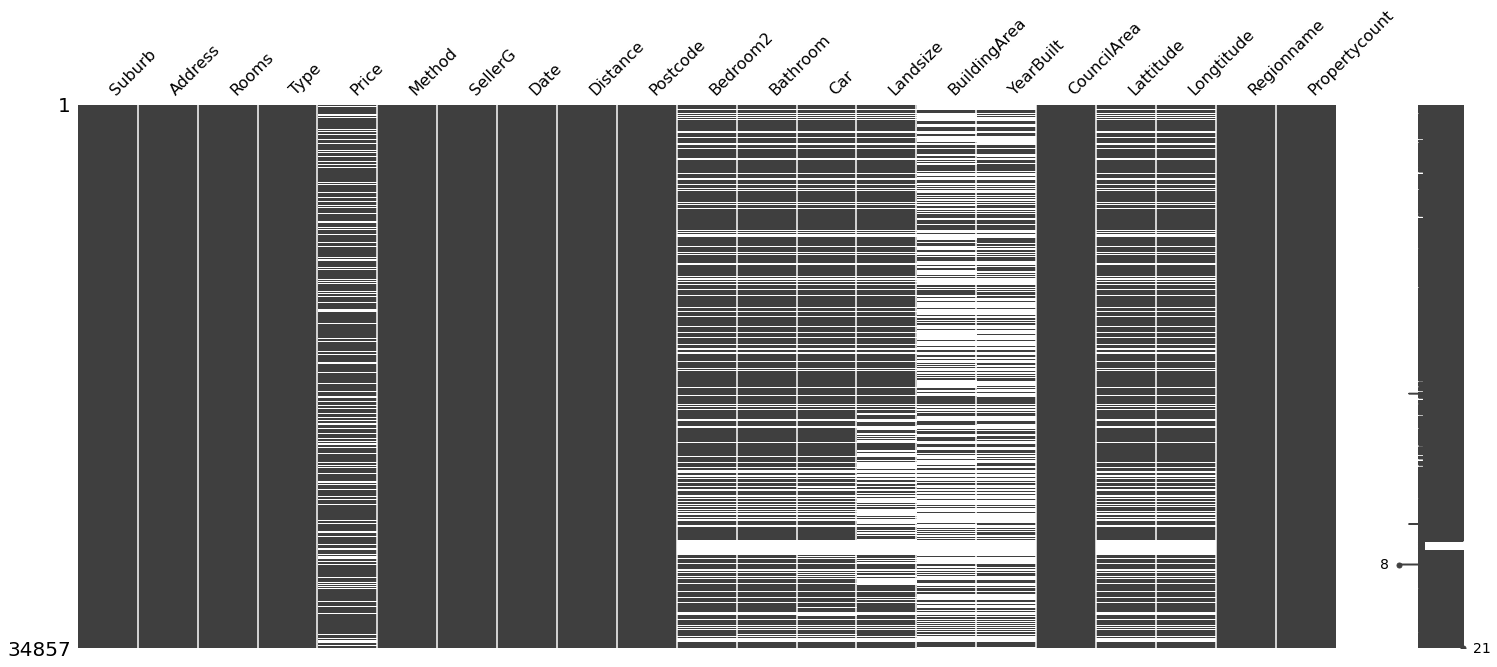

In [22]:
msno.matrix(df)

# EDA

* Missing values
* Outliers


### Separate the dataset into categorical and numerical.

In [23]:
cat_cols = [col for col in df if df[col].dtype == 'O']

print('Number of categorical values: ',len(cat_cols))

df[cat_cols].head()

Number of categorical values:  8


,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan


In [24]:
for col in df[cat_cols]:
    print(f'{col} has {len(df[col].unique())} distict values.')

Suburb has 351 distict values.
Address has 34009 distict values.
Type has 3 distict values.
Method has 9 distict values.
SellerG has 388 distict values.
Date has 78 distict values.
CouncilArea has 34 distict values.
Regionname has 9 distict values.


In [25]:
cp_cat_cols = ['Type', 'Method', 'CouncilArea', 'Regionname']

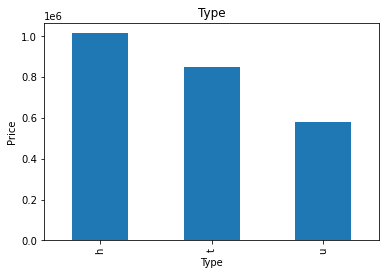

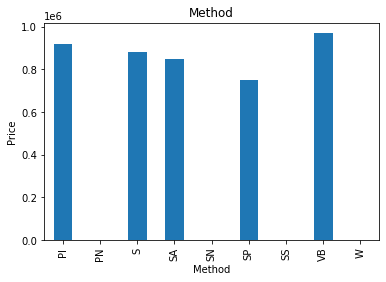

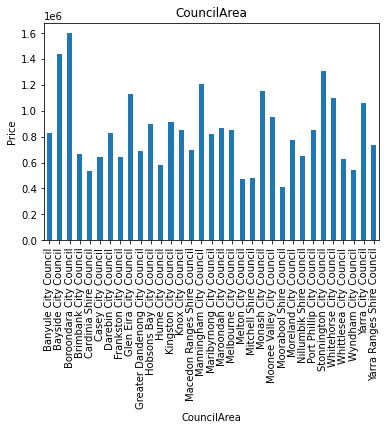

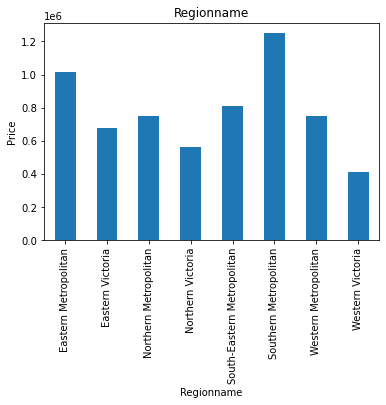

In [26]:
for col in df[cp_cat_cols]:
    data = df.copy()
    data.groupby(col)['Price'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col)
    plt.show()

In [27]:
df[cat_cols].isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    3
Regionname     3
dtype: int64

In [28]:
# Fill missing values with mode in CouncilArea and Regionname
df['CouncilArea'].fillna(df['CouncilArea'].mode()[0], inplace = True)
df['Regionname'].fillna(df['Regionname'].mode()[0], inplace = True)
df[cat_cols].isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    0
Regionname     0
dtype: int64

In [29]:
num_cols = [col for col in df if df[col].dtype != 'O']

print('Number of numerical values: ',len(num_cols))

df[num_cols].head()

Number of numerical values:  13


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


#### Divide numerical values into two groups: discrete and continuous

In [30]:
disc_cols = [col for col in num_cols if len(df[col].unique())<25]
df[disc_cols].head()

,Rooms,Bedroom2,Bathroom,Car
0,2,2.0,1.0,1.0
1,2,2.0,1.0,1.0
2,2,2.0,1.0,0.0
3,3,3.0,2.0,1.0
4,3,3.0,2.0,0.0


In [31]:
cont_cols = [col for col in num_cols if col not in disc_cols]
df[cont_cols].head()

,Price,Distance,Postcode,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,NaN,2.5,3067.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,1480000.0,2.5,3067.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,1035000.0,2.5,3067.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,NaN,2.5,3067.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,1465000.0,2.5,3067.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [32]:
df[num_cols].isnull().sum()

Rooms                0
Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
Lattitude         7976
Longtitude        7976
Propertycount        3
dtype: int64

In [33]:
for col in df[cont_cols]:
    print(col, len(df[col].unique())) 

Price 2872
Distance 216
Postcode 212
Landsize 1685
BuildingArea 741
YearBuilt 161
Lattitude 13403
Longtitude 14525
Propertycount 343


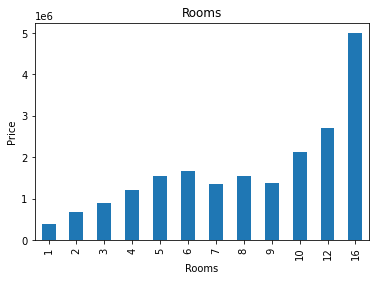

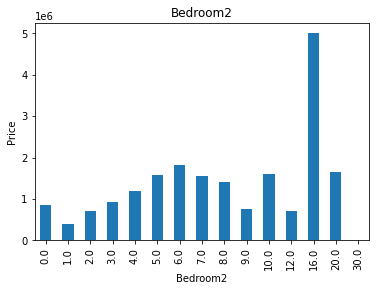

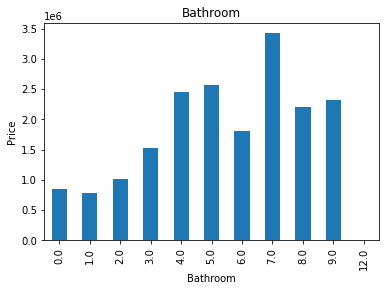

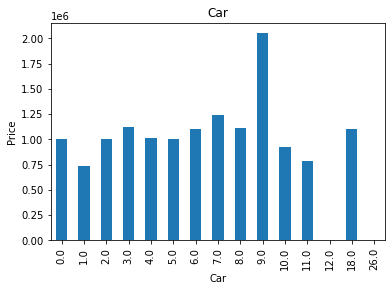

In [34]:
# discrete features and Price

for col in disc_cols:
    data = df.copy()
    data.groupby(col)['Price'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col)
    plt.show()

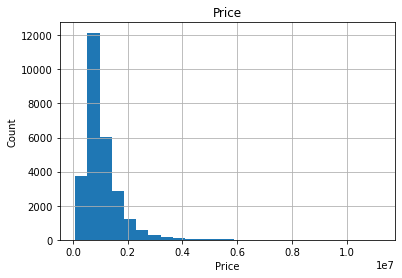

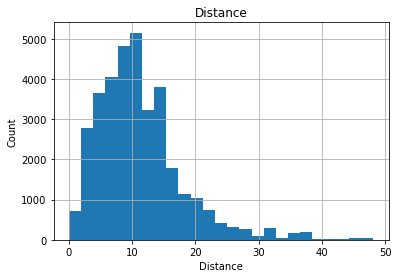

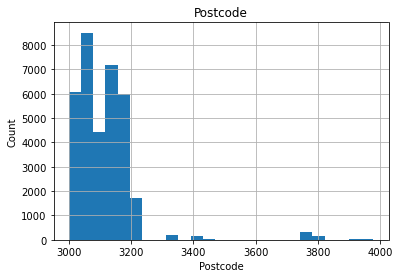

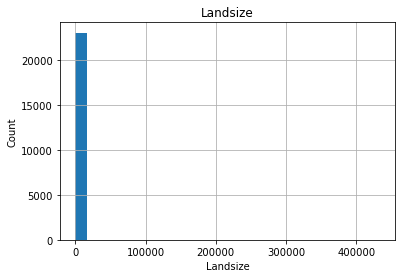

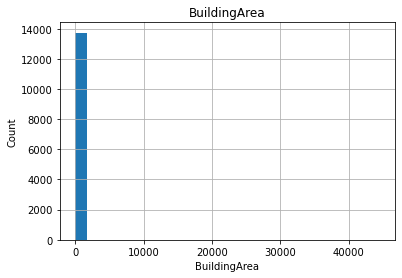

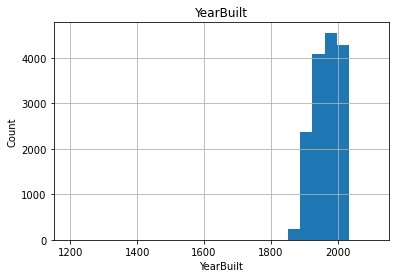

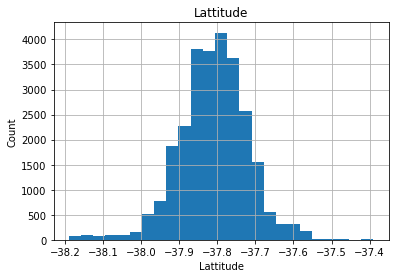

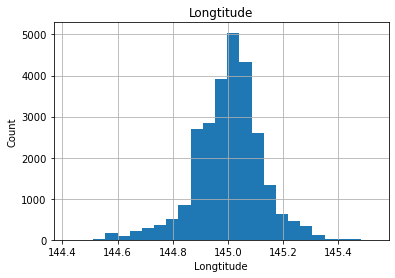

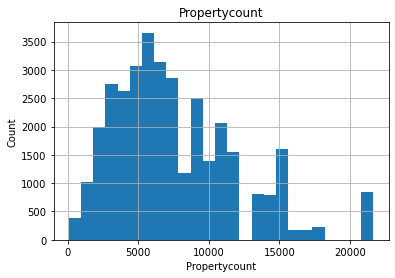

In [35]:
# Continuous features - with histogram

for col in cont_cols:
    data = df[col]
    df[col].hist(bins = 25)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

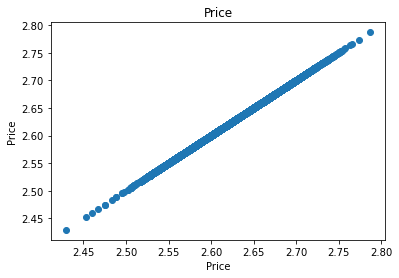

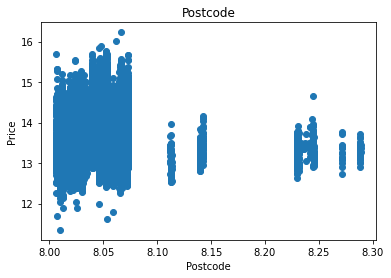

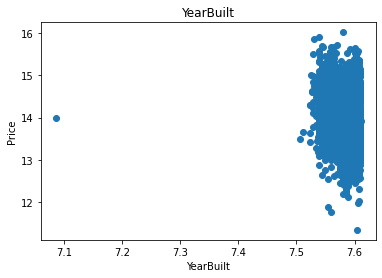

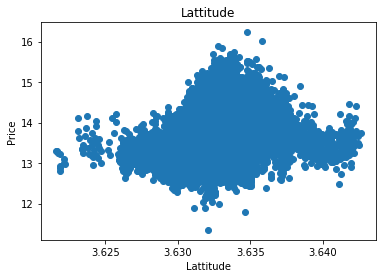

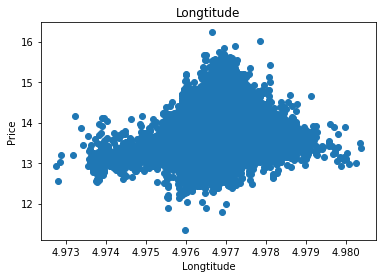

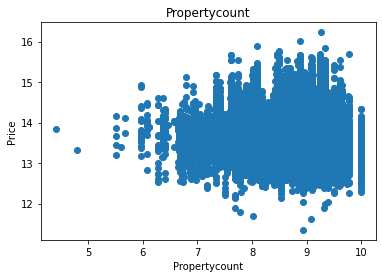

In [36]:
# Using logarithmic transformation
for col in cont_cols:
    data = df.copy()
    if 0 in data[col].unique():
        pass
    else:
        data[col] = np.log(abs(data[col])) # To change Lattitude to positive, abs is used
        data['Price'] = np.log(data['Price'])
        
        plt.scatter(data[col], data['Price'])
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.title(col)
        plt.show()

#### Outliers

log transformation is used to remove skewness

Many outliers in cont_cols, so median is required to fill the missing values.

mode is used for disc_cols.

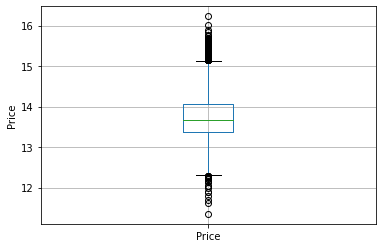

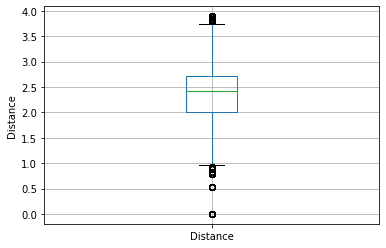

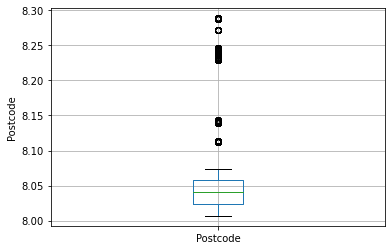

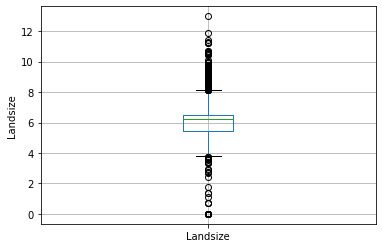

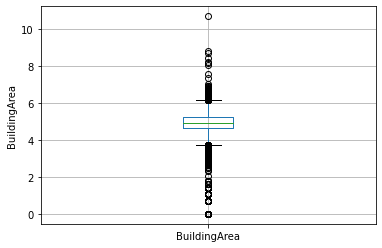

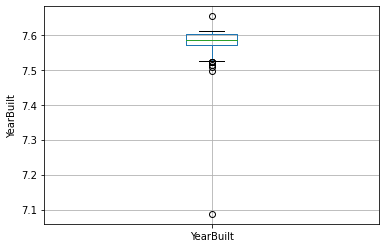

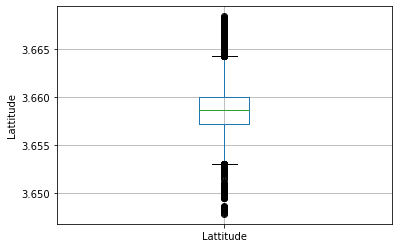

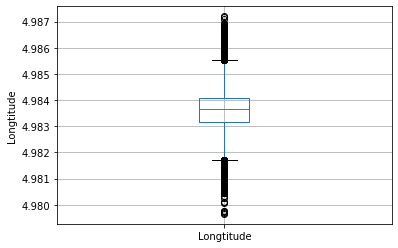

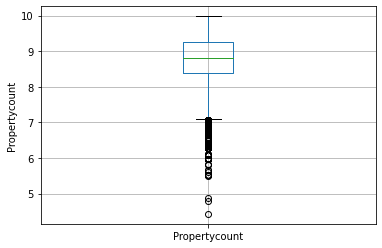

In [37]:
# Continuous features
for col in cont_cols:
    data = df.copy()
    data[col] = np.log1p(abs(df[col]))
    data.boxplot(column=col)
    plt.ylabel(col)
    plt.show()

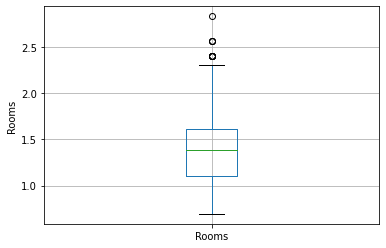

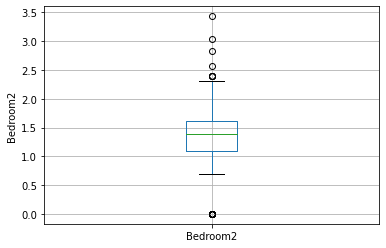

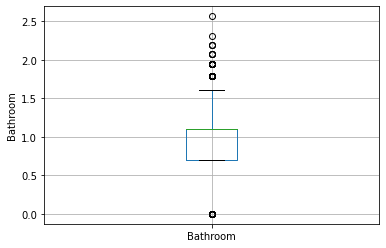

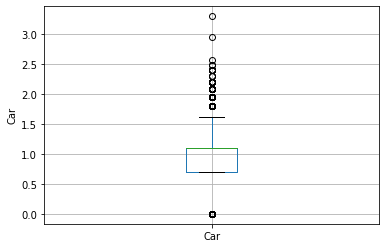

In [38]:
# Discrete features
for col in disc_cols:
    data = df.copy()
    data[col] = np.log1p(df[col])
    data.boxplot(column=col)
    plt.ylabel(col)
    plt.show()

In [39]:
for col in cont_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace = True)

df[cont_cols].isnull().sum()

Price            0
Distance         0
Postcode         0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [40]:
for col in disc_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace = True)

df[disc_cols].isnull().sum()

Rooms       0
Bedroom2    0
Bathroom    0
Car         0
dtype: int64

In [41]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64